In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path=Path("..") / "result" / "results.csv"
df = pd.read_csv(path)

print("Total rows:", len(df))
print("Columns:", df.columns.tolist())
df.head()

Total rows: 11835
Columns: ['db_id', 'original_nl', 'paraphrased_nl', 'gt_sql', 'generated_sql', 'matched', 'attempts']


,db_id,original_nl,paraphrased_nl,gt_sql,generated_sql,matched,attempts
0,concert_singer,How many singers do we have?,What is the total count of singers in the data...,SELECT count(*) FROM singer,SELECT count(*) FROM singer,True,1.0
1,concert_singer,What is the total number of singers?,What is the overall count of singers.,SELECT count(*) FROM singer,SELECT count(*) FROM singer,True,1.0
2,concert_singer,"Show name, country, age for all singers ordere...","What are the names, countries, and ages of all...","SELECT name , country , age FROM singer ORDE...","SELECT Name , Country , Age FROM singer ORDER ...",True,1.0
3,concert_singer,"What are the names, countries, and ages for ev...","What are the singer names, countries, and ages...","SELECT name , country , age FROM singer ORDE...","SELECT Name , Country , Age FROM singer ORDER ...",True,1.0
4,concert_singer,"What is the average, minimum, and maximum age ...","What are the mean, lowest, and highest ages of...","SELECT avg(age) , min(age) , max(age) FROM s...","SELECT avg(Age) AS mean_age, min(Age) AS lowes...",True,2.0


In [11]:
# Count how many matched
matched_count = df['matched'].sum()
total = len(df)
accuracy = matched_count / total * 100

print(f" Matched: {matched_count}/{total} ({accuracy:.2f}%)")

 Matched: 8684/11835 (73.38%)


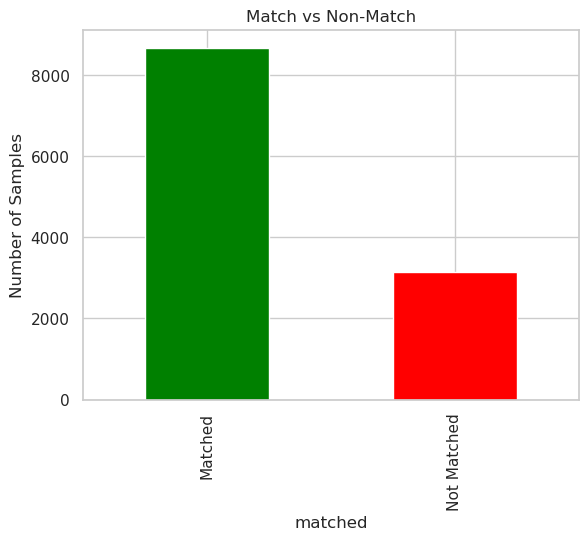

In [12]:
sns.set_theme(style="whitegrid")
match_counts = df['matched'].value_counts()
match_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Match vs Non-Match")
plt.xticks(ticks=[0,1], labels=["Matched", "Not Matched"])
plt.ylabel("Number of Samples")
plt.show()


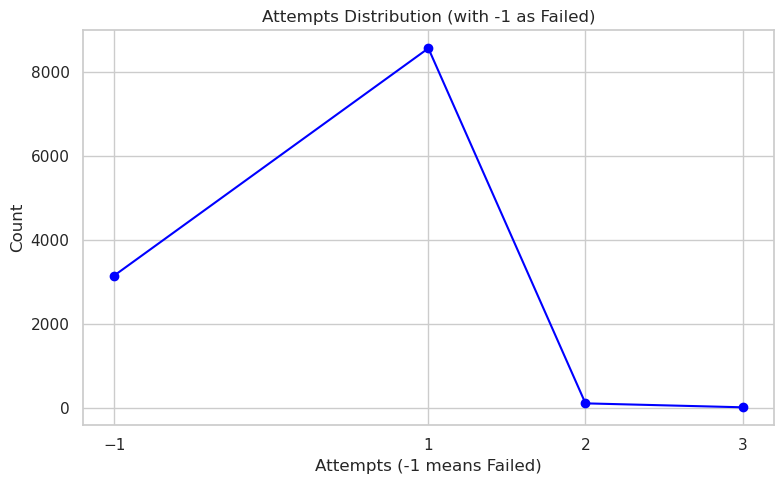

In [20]:
attempts_clean = df['attempts'].fillna(-1).astype(int)
attempt_counts = attempts_clean.value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(attempt_counts.index, attempt_counts.values, marker='o', linestyle='-', color='blue')
plt.xticks(attempt_counts.index)  # ensure x-ticks match attempts (even -1)

plt.title("Attempts Distribution (with -1 as Failed)")
plt.xlabel("Attempts (-1 means Failed)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Convert to int (handle missing/failed)
df['attempts'] = df['attempts'].fillna(-1).astype(int)

# Create readable version
attempt_summary = df['attempts'].replace(-1, 'Failed').value_counts().sort_index(
    key=lambda x: [float('inf') if v == 'Failed' else int(v) for v in x]
)

# Convert to DataFrame for a nice table
attempt_table = attempt_summary.reset_index()
attempt_table.columns = ['Attempts', 'Count']
print(attempt_table)


  Attempts  Count
0        1   8578
1        2    100
2        3      6
3   Failed   3151
